In [1]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:

wandb_group_names = [
    
]

In [3]:
"""
'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE',
"""

"\n'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean',

In [4]:
# Keys of interest:
"""
'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',
 
 'adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/mean'
"""

"\n'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',\n"

In [5]:
""" From final07 exp (multiple iterations)"""
groups_wandb = (
("Finetuning_2022-09-27_17-59-29_UID67863feb-7342-46a4-8c3c-6c0cab5c2c23","10","0.01"),
("Finetuning_2022-09-14_19-06-02_UID2c4355e2-c42c-46d9-ba37-8cb8abe8d1d0_MATT","1","0.01"),
)

' From final07 exp (multiple iterations)'

In [6]:
csv_parent_dir ='/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/adhoc_results'
csv_file_iter1_lr0_01 = os.path.join(csv_parent_dir,"wandb_export_2022-10-12T18_34_18.977-07_00.csv")
csv_file_iter10_lr0_01 = os.path.join(csv_parent_dir,"wandb_export_2022-10-12T18_35_00.077-07_00.csv")

In [7]:
pd_iter1_df = pd.read_csv(csv_file_iter1_lr0_01).drop(['Unnamed: 0'], axis=1, errors='ignore')
pd_iter1_df

pd_iter10_df = pd.read_csv(csv_file_iter10_lr0_01).drop(['Unnamed: 0'], axis=1, errors='ignore')
pd_iter10_df


,Name,TRAIN.INNER_LOOP_ITERS,SOLVER.BASE_LR,adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean,adhoc_users_aggregate/test_action_batch/loss/SE,adhoc_users_aggregate/test_action_batch/loss/mean,adhoc_users_aggregate/train_action_batch/loss_running_avg/mean,train_action_batch/balanced_LL,adhoc_users_aggregate/train_action_batch/balanced_LL/mean,CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg,...,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean
0,Finetuning_2022-09-14_19-06-02_UID2c4355e2-c42...,1,0.01,10.91323,0.306932,5.78989,5.214387,2.985043,2.985043,10.065865,...,27.34197,138.5,17.910846,86.361118,0.10388,2.143395,50.944251,257.5,150.868583,839.524587


,Name,TRAIN.INNER_LOOP_ITERS,SOLVER.BASE_LR,adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean,adhoc_users_aggregate/test_action_batch/loss/SE,adhoc_users_aggregate/test_action_batch/loss/mean,adhoc_users_aggregate/train_action_batch/loss_running_avg/mean,train_action_batch/balanced_LL,adhoc_users_aggregate/train_action_batch/balanced_LL/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean,...,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean
0,Finetuning_2022-09-27_17-59-29_UID67863feb-734...,10,0.01,10.01661,0.768184,9.625833,6.279683,8.068475,8.068475,17.876509,...,26.758612,140.7,7.178355,32.213428,0.162938,2.983321,51.729005,255.3,217.676209,1173.76393


In [9]:
key_fmts = [
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_{}_batch/loss/{}_COND/{}/mean']


# Even though sum is averaged over users, this gives factor 10 difference, but is for all nbs, so if using Wrong/Correct w.r.t. eachother still correct

print(f"ITER1")
for key_fmt in key_fmts:
    key = key_fmt.format(action_mode,mean_mode)
    print(f"{key}: {pd_iter1_df[key].tolist()[0]}")

print(f"ITER10")
for key_fmt in key_fmts:
    key = key_fmt.format(action_mode,mean_mode)
    print(f"{key}: {pd_iter10_df[key].tolist()[0]}")

ITER1


NameError: name 'action_mode' is not defined

/tmp/ipykernel_6860/1721335538.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


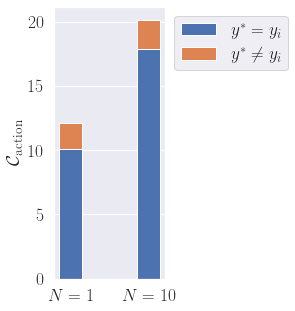

/tmp/ipykernel_6860/1721335538.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


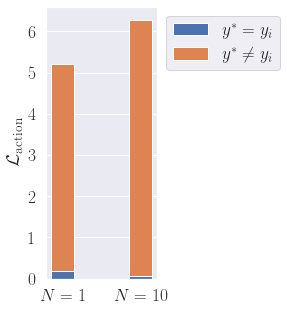

/tmp/ipykernel_6860/1721335538.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


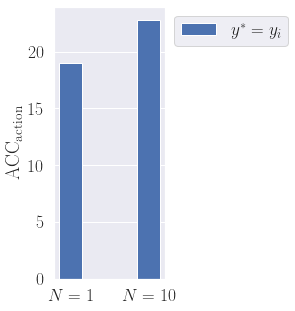

In [30]:
import seaborn as sns
import datetime

# CONFIG
action_mode = 'action'
mean_mode = 'sum'

# SAVE
main_outdir = "../imgs/notebooks"
title = "ACC_LIKELIHOOD_ANALYSIS"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)

# PLOT CONFIG
figsize = (2,5)
sns.set_context("paper")
sns.set(font_scale=1.6)
LL_ylabel = r'$\mathcal{C}_{\text{action}}$'
loss_ylabel =  r'$\mathcal{L}_{\text{action}}$'
acc_ylabel =  r'$\text{ACC}_{\text{action}}$'
# Set fonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20



# Use latex in mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command

# Set latex font in mpl
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# sns.set_theme(rc={
#     'font.family':'DeJavu Serif',
#     'font.serif': 'Times New Roman',
#     'font.size':30,
# })


def get_key_name(action_mode,mean_mode,correct_mode,metric_mode):
    assert action_mode in  ['action','verb','noun']
    assert mean_mode in ['avg','count','sum']
    assert correct_mode in ['CORRECT','WRONG']
    assert metric_mode in ['LL','loss']
    
    return 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_{}_batch/{}/{}_COND/{}/mean'.format(
        action_mode,metric_mode, correct_mode, mean_mode
    )

def do_plot(labels,corrects,wrongs,width=0.3,y_label='$p(y)$',filename="plotfilename"):
    fig, ax = plt.subplots(figsize=figsize)

    ax.bar(labels, corrects, width, yerr=None, label=r'$y^*=y_i$')
    
    # Stack on top
    if wrongs is not None:
        ax.bar(labels, wrongs, width, yerr=None, label=r'$y^*\ne y_i$', bottom=corrects)

    ax.set_ylabel(y_label)
    ax.grid(axis='x')
    
    # ax.set_title('Scores by group and gender')
    ax.legend()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    fig.tight_layout()
    # SAVE
    filename = filename.replace(' ','') + '.pdf'
    filepath = os.path.join(parent_dirpath,filename)
    os.makedirs(parent_dirpath, exist_ok=True)
    fig.savefig(filepath, bbox_inches='tight')
    
    plt.show()
    plt.close('all')
    
###################################
# Likelihood

labels = ['$N=1$','$N=10$']
corrects = []
wrongs = []



def get_final_results(pd_iter_df, metric='LL'):
    # Iter 1
    LL_iter_correct = pd_iter_df[get_key_name(action_mode,'avg','CORRECT',metric)].tolist()[0]
    LL_iter_correct_cnt = pd_iter_df[get_key_name(action_mode,'count','CORRECT',metric)].tolist()[0]

    LL_iter_wrong = pd_iter_df[get_key_name(action_mode,'avg','WRONG',metric)].tolist()[0]
    LL_iter_wrong_cnt = pd_iter_df[get_key_name(action_mode,'count','WRONG',metric)].tolist()[0]

    return LL_iter_correct, LL_iter_wrong



LL_iter1_correct_p, LL_iter1_wrong_p = get_final_results(pd_iter1_df, metric='LL')
corrects.append(LL_iter1_correct_p)
wrongs.append(LL_iter1_wrong_p)

LL_iter10_correct_p, LL_iter10_wrong_p = get_final_results(pd_iter10_df, metric='LL')
corrects.append(LL_iter10_correct_p)
wrongs.append(LL_iter10_wrong_p)

do_plot(labels,corrects,wrongs, y_label=LL_ylabel,filename=f"C_{title}")


###################################
# LOSS

labels = ['$N=1$','$N=10$']
corrects = []
wrongs = []



# Iter 1
loss_iter1_correct_p, loss_iter1_wrong_p = get_final_results(pd_iter1_df, metric='loss')
corrects.append(loss_iter1_correct_p)
wrongs.append(loss_iter1_wrong_p)


# Iter 10
loss_iter10_correct_p, loss_iter10_wrong_p = get_final_results(pd_iter10_df, metric='loss')
corrects.append(loss_iter10_correct_p)
wrongs.append(loss_iter10_wrong_p)

do_plot(labels,corrects,wrongs,y_label=loss_ylabel,filename=f"L_{title}")


#################################
# ACCURACY
acc_key = 'adhoc_users_aggregate/train_action_batch/top1_acc_running_avg/mean'
acc_iter1 = pd_iter1_df[acc_key].tolist()[-1]
acc_iter10 = pd_iter10_df[acc_key].tolist()[-1]

corrects = [acc_iter1, acc_iter10]
wrongs = None
do_plot(labels,corrects,wrongs,y_label=acc_ylabel,filename=f"ACC_{title}")